In [ ]:
!pip install pandas
!pip install seaborn
!pip install scikit-learn

In [ ]:
import pandas as pd
import collections
import numpy as np
import seaborn as sns

"""
column_names = {'Número de equipo':"team_number",
                'Número de partido':"match_number",
                'Número de piezas colocadas en el primer nivel':"auto_1st_gp",
                'Número de piezas colocadas en el segundo nivel':"auto_2nd_gp",
                'Número de piezas colocadas en el tercer nivel':"auto_3rd_gp",
                'Tipo de Game Piece manejada':"auto_gp_type",
                'Mobility Points ':"mobility", 
                'Estado de la rampa':"auto_ramp_state",
                'Número de piezas colocadas en el primer nivel.1':"teleop_1st_gp",
                'Número de piezas colocadas en el segundo nivel.1':"teleop_2nd_gp",
                'Número de piezas colocadas en el tercer nivel.1':"teleop_3rd_gp",
                'Tipo de GP manejada':"teleop_gp_type",
                'Nivel de rampa':"teleop_ramp_state", 
                'Defensa':"defense", 
                'Calificación de defensa':"defense_rating", 
                'Desconexión':"desconnect", 
                'Feeder':"feeder",
                'Punto de inicio del robot':"start_pos"}
"""

my_dict = {
    "field1": "TeamNum",
    "field2": "MatchNum",
    "field3": "Scouter",
    "field4": "Auto_start_pos",
    "field5": "Auto_1st",
    "field6": "Auto_2nd",
    "field7": "Auto_3rd",
    "field8": "Auto_Zone",
    "field9": "Auto_gp_type",
    "field10": "Auto_mobility",
    "field11": "Auto_charge_station",
    "field12": "Teleop_1st",
    "field13": "Teleop_2nd",
    "field14": "Teleop_3rd",
    "field15": "Teleop_Zone",
    "field16": "Teleop_gp_type",
    "field17": "Teleop_charge_station",
    "field18": "feeder",
    "field19": "defense",
    "field20": "defense_Score",
    "field21": "disconnection",
}

df = pd.read_csv("DATA.csv")#.drop(columns=["Marca temporal", "Scouter", "Zona en la que colocó las gp", "Zona en la que colocó las gp.1"])
df

In [ ]:
df.rename(columns=my_dict, inplace=True)

"""_summary_
df["auto_gp_type"] = df["auto_gp_type"].replace({"Cube":0, 
                                                 "Cone":1, 
                                                 "Ambos":3,
                                                 "Cube, Ambos":3,
                                                 "Cone, Ambos":3, 
                                                 "Cube, Cone":3, 
                                                 "Cone, Cube":3})
df["teleop_gp_type"] = df["teleop_gp_type"].replace({"Cube":0, 
                                                     "Cone":1, 
                                                     "Ambos":3, 
                                                     "Cube, Ambos":3,                                                      
                                                     "Cone, Ambos":3, 
                                                     "Cube, Cone":3, 
                                                     "Cone, Cube":3})
    """
df.to_csv('renamed.csv', index=False)

In [ ]:
df = pd.read_csv("renamed.csv")
df_clean = df.drop_duplicates(subset=["match_id", "robot_id"])
df_clean

In [ ]:
# Clean duplicates
print("Duplicates analysis considering Nans")
duplicates = df.groupby(["robot_id", "match_id"], as_index=False, dropna=False).size()
duplicates[duplicates["size"]>1].head(100)  # Size columns tells how many of them areB

In [ ]:
duplicates[duplicates["size"]<=1].head(1000).to_csv('nodupe.csv', index=False)
# Size columns tells how many of them are

In [ ]:
df = df_clean

In [ ]:
teams = df["robot_id"].unique()
teams.sort()
print("team_number: ", len(teams))
print("List:", teams)

In [ ]:
counter = collections.Counter(df["match_id"])
counter

In [ ]:
counter = collections.Counter(df["robot_id"])
counter

In [ ]:
df.info()

In [ ]:
# Make sure things are in integer
df["Auto_Zone"] = df["Auto_Zone"].str.extract(r"\[(\d+)\]")
df['Auto_1st'] = df['Auto_1st'].fillna(0).astype(int)
df['Auto_2nd'] = df['Auto_2nd'].fillna(0).astype(int)
df['Auto_3rd'] = df['Auto_3rd'].fillna(0).astype(int)
df['Auto_gp_type'] = df['Auto_gp_type'].fillna(0)
df['Teleop_gp_type'] = df['Teleop_gp_type'].fillna(0)

In [ ]:
df["Auto_gp_type"] = df["Auto_gp_type"].str.extract(r"\[(\d+)\]")
df["Teleop_gp_type"] = df["Teleop_gp_type"].str.extract(r"\[(\d+)\]")


In [ ]:
#df['Auto_Zone'] = df['Auto_Zone'].fillna(0).astype(int)
df['Auto_mobility'] = df['Auto_mobility'].fillna(0).astype(int)
df['Auto_charge_station'] = df['Auto_charge_station'].fillna(0).astype(int)
df['Teleop_1st'] = df['Teleop_1st'].fillna(0).astype(int)
df['Teleop_2nd'] = df['Teleop_2nd'].fillna(0).astype(int)
df['Teleop_3rd'] = df['Teleop_3rd'].fillna(0).astype(int)
df['Teleop_charge_station'] = df['Teleop_charge_station'].fillna(0).astype(int)
df['feeder'] = df['feeder'].fillna(0).astype(int)
df['defense'] = df['defense'].fillna(0).astype(int)
df['defense_Score'] = df['defense_Score'].fillna(0).astype(int)
df['disconnection'] = df['disconnection'].fillna(0).astype(int)

In [ ]:
df['Auto_gp_type'] = df['Auto_gp_type'].fillna(0).astype(int)
df['Teleop_gp_type'] = df['Teleop_gp_type'].fillna(0).astype(int)


In [ ]:
#df= df.drop(columns=["Auto_Zone", "Teleop_Zone"])
df

In [ ]:
df

In [ ]:
col_number = df.select_dtypes(include ='number').columns
print(col_number)
df[col_number] = df[col_number].fillna(0) 
df

In [ ]:
col_object = df.select_dtypes(include ='object').columns
df["team_number"] = df["team_number"].astype('str')
df[col_object] = df[col_object].fillna('')
df

In [ ]:
df["mobility"] = df["mobility"].map({"Sí":1, "No":0}).fillna(0)
df["desconnect"] = df["desconnect"].map({"Sí":1, "No":0}).fillna(0)
df["defense"] = df["defense"].map({"Sí":1, "No":0}).fillna(0)
df["feeder"] = df["feeder"].map({"Sí":1, "No":0}).fillna(0)
df["start_pos"] = df["start_pos"].map({"A":0, "B":1, "C":2}).fillna(0)

df["auto_ramp_state"] = df["auto_ramp_state"].map({"Engaged":3, "Parked":1, "Docked":2}).fillna(0)
df["teleop_ramp_state"] = df["teleop_ramp_state"].map({"Engaged":3, "Parked":1, "Docked":2}).fillna(0)
df

In [46]:
metrics = df.groupby("robot_id").mean().reset_index()
#[df.columns.drop(['team_number', 'match_number'])]
metrics = metrics.fillna(0)

/tmp/ipykernel_11715/1722174507.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  metrics = df.groupby("robot_id").mean().reset_index()


In [ ]:
#sns.set(style="ticks", color_codes=True)
#g = sns.pairplot(metrics, kind="reg", plot_kws={'line_kws':{'color':'red'}}, height=2)

In [47]:
stats_train = metrics.drop(columns=["robot_id"])

/home/armando/repos/work/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/armando/repos/work/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/armando/repos/work/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/armando/repos/work/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

<AxesSubplot: >

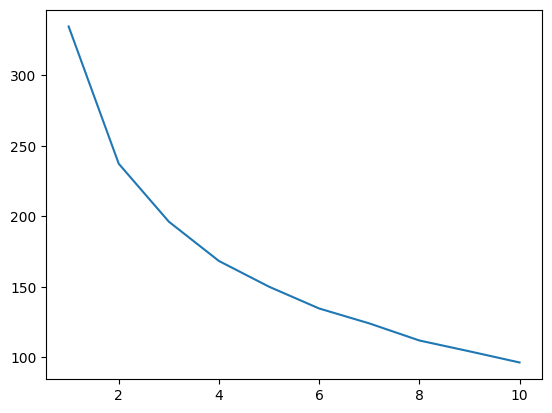

In [48]:
from sklearn.cluster import KMeans
stats_transformed = stats_train
wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, random_state=123)
    clustering.fit(stats_transformed)
    wcss.append(clustering.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss)

In [49]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=123)
kmeans.fit(stats_transformed)
cluster_labels = kmeans.labels_
metrics['cluster'] = cluster_labels

/home/armando/repos/work/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [50]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

print('Silhouette: %d' % silhouette_score(stats_transformed, cluster_labels)
)

#Nuestro harabasz score es bueno
print('calinski_harabasz_score: %d' % calinski_harabasz_score(stats_transformed, cluster_labels))


Silhouette: 0
calinski_harabasz_score: 13


In [51]:
for i, x in enumerate(cluster_labels):
    print(i, x)

0 1
1 0
2 1
3 3
4 2
5 1
6 0
7 2
8 0
9 4
10 0
11 4
12 0
13 1
14 0
15 0
16 3
17 4
18 1
19 3
20 0
21 4
22 4
23 1
24 0
25 4
26 1
27 3
28 0
29 1
30 2
31 2
32 2
33 0
34 0
35 0
36 3
37 3
38 1
39 4
40 1
41 1
42 1
43 1
44 4
45 1
46 1
47 1
48 3
49 1


In [52]:
X_dist = kmeans.transform(stats_transformed)**2
metrics['farthest from all'] = X_dist.sum(axis=1).round(2)
metrics['likely_cluster'] = np.array([X_dist[i][x] for i,x in enumerate(cluster_labels)]) 
metrics[["c0","c1", "c2", "c3", "c4"]] = X_dist  # how far are they from the cluster 0, 1, 2 and 3

In [53]:
metrics.sort_values(by=['farthest from all'], ascending=False).head(10)

,robot_id,Auto_start_pos,Auto_1st,Auto_2nd,Auto_3rd,Auto_gp_type,Auto_mobility,Auto_charge_station,Teleop_1st,Teleop_2nd,...,disconnection,Teleop_3rd,cluster,farthest from all,likely_cluster,c0,c1,c2,c3,c4
7,1881,2.0,0.0,0.0,0.0,0.0,0.00,1.00,4.000000,2.000000,...,0.0,0.00,2,153.71,7.096078,42.563302,37.200919,7.096078,26.486961,40.362847
4,1561,2.0,0.0,0.0,0.0,0.0,0.00,2.00,4.333333,1.333333,...,0.0,1.00,2,135.39,6.022744,34.999200,36.261050,6.022744,20.248866,37.862847
31,4646,2.0,0.0,0.2,0.6,0.0,0.60,1.60,1.400000,1.000000,...,0.0,1.80,2,125.89,2.414744,28.125866,32.501703,2.414744,28.854580,33.991181
30,4613,3.0,0.5,0.0,0.5,0.0,1.00,0.00,1.000000,1.000000,...,0.0,1.50,2,97.38,5.316078,19.499200,24.025429,5.316078,22.903628,25.633681
48,9007,0.0,0.0,0.0,0.0,0.0,0.00,0.00,4.000000,0.000000,...,0.0,0.00,3,91.00,5.725057,21.181251,16.836213,33.689411,5.725057,13.571181
37,6809,3.0,0.0,0.0,0.0,0.0,1.00,0.00,4.000000,1.000000,...,0.0,0.00,3,83.30,4.963152,17.437661,14.195037,29.216078,4.963152,17.487847
44,8163,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,...,1.0,0.00,4,80.13,5.487847,13.250482,6.528370,38.662744,16.201247,5.487847
18,2395,2.0,0.0,1.0,0.0,0.0,0.00,2.00,0.000000,1.000000,...,0.0,0.00,1,72.95,5.259742,10.514584,5.259742,32.769411,14.963152,9.446181
32,5006,1.5,0.0,0.0,0.5,0.0,0.25,0.75,1.250000,0.000000,...,0.0,2.25,2,72.30,4.621911,13.073879,18.437929,4.621911,16.674461,19.487847
29,4523,3.0,0.0,0.0,0.0,0.0,0.00,2.00,0.000000,0.000000,...,0.0,0.00,1,71.17,5.838174,8.001764,5.838174,32.982744,13.153628,11.196181


In [67]:
counter = collections.Counter(cluster_labels)
counter

Counter({1: 17, 0: 13, 3: 7, 2: 5, 4: 8})

In [55]:
def cluster_stats(columns):
    output = pd.DataFrame({'cluster':[ i for i in range(n_clusters)]})
    for column in columns:
        lst = []
        for i in range(n_clusters):
            mean = metrics[metrics['cluster'] == i].describe()[column]['mean']
            lst.append([i, round(mean,2)])
        df = pd.DataFrame(lst)
        df.columns = ['cluster', column]
        output = pd.merge(output, df, on='cluster', how='outer')
    return output

columns = stats_transformed.columns
cluster_stats(columns)

,cluster,Auto_start_pos,Auto_1st,Auto_2nd,Auto_3rd,Auto_gp_type,Auto_mobility,Auto_charge_station,Teleop_1st,Teleop_2nd,Teleop_gp_type,Teleop_charge_station,feeder,defense,defense_Score,disconnection,Teleop_3rd
0,0,2.26,0.07,0.16,0.37,0.0,0.28,0.49,0.67,0.30,0.0,1.48,0.00,0.05,0.42,0.10,1.98
1,1,2.10,0.13,0.12,0.04,0.0,0.22,0.41,0.78,0.31,0.0,0.77,0.03,0.12,0.30,0.31,0.03
2,2,2.10,0.10,0.04,0.32,0.0,0.37,1.07,2.40,1.07,0.0,1.20,0.18,0.81,4.60,0.00,1.31
3,3,1.69,0.05,0.10,0.24,0.0,0.48,0.67,2.90,0.33,0.0,1.57,0.05,0.10,0.69,0.02,0.38
4,4,0.69,0.00,0.12,0.25,0.0,0.46,0.06,0.62,1.02,0.0,1.54,0.00,0.04,0.33,0.12,0.19


In [56]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [63]:
import copy

cluster_num = 4

TOP= copy.deepcopy(metrics[metrics["cluster"]==cluster_num])
print(f"Mean Distance to Cluster {cluster_num} is ", TOP["likely_cluster"].mean())    
TOP.sort_values(by=['likely_cluster'], ascending=True)

Mean Distance to Cluster 4 is  3.039930555555556


,robot_id,Auto_start_pos,Auto_1st,Auto_2nd,Auto_3rd,Auto_gp_type,Auto_mobility,Auto_charge_station,Teleop_1st,Teleop_2nd,Teleop_gp_type,Teleop_charge_station,feeder,defense,defense_Score,disconnection,Teleop_3rd,cluster,farthest from all,likely_cluster,c0,c1,c2,c3,c4
9,2083,1.0,0.0,0.0,0.0,0.0,0.500000,0.5,0.5,1.500000,0.0,2.000000,0.0,0.000000,0.000000,0.0,0.5,4,48.74,1.050347,5.951764,4.768566,28.566078,8.403628,1.050347
17,2373,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,1.000000,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.0,4,57.33,1.362847,10.563302,5.442095,31.336078,8.629819,1.362847
11,2306,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000,0.0,2.000000,0.0,0.000000,0.000000,0.0,0.0,4,70.37,1.612847,11.386379,8.032291,35.989411,13.344104,1.612847
25,3465,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.0,1.000000,0.0,2.000000,0.0,0.000000,0.000000,0.0,1.0,4,45.14,1.612847,4.550482,5.210723,27.376078,6.391723,1.612847
21,2972,1.0,0.0,0.0,1.0,0.0,0.000000,0.0,1.0,2.000000,0.0,2.000000,0.0,0.000000,0.000000,0.0,0.0,4,58.06,2.362847,9.760738,7.010723,29.962744,8.963152,2.362847
39,7483,1.0,0.0,0.0,1.0,0.0,0.500000,0.0,1.5,0.000000,0.0,2.000000,0.0,0.000000,0.000000,0.0,0.0,4,48.48,2.862847,7.491507,4.746017,28.962744,4.415533,2.862847
44,8163,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.0,0.0,4,80.13,5.487847,13.250482,6.528370,38.662744,16.201247,5.487847
22,3160,1.5,0.0,1.0,0.0,0.0,0.666667,0.0,0.0,1.666667,0.0,1.333333,0.0,0.333333,2.666667,0.0,0.0,4,61.46,7.967014,13.230396,10.036213,14.450522,15.776644,7.967014


In [69]:
team = 2352
metrics[metrics["robot_id"]==team]

,robot_id,Auto_start_pos,Auto_1st,Auto_2nd,Auto_3rd,Auto_gp_type,Auto_mobility,Auto_charge_station,Teleop_1st,Teleop_2nd,Teleop_gp_type,Teleop_charge_station,feeder,defense,defense_Score,disconnection,Teleop_3rd,cluster,farthest from all,likely_cluster,c0,c1,c2,c3,c4
14,2352,2.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.5,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0,66.55,1.958174,1.958174,9.656801,29.969411,14.3322,10.633681


In [66]:
TOP2= copy.deepcopy(metrics[metrics["cluster"]==0])
TOP3= copy.deepcopy(metrics[metrics["cluster"]==2])
TOP4= copy.deepcopy(metrics[metrics["cluster"]==1])
TOP5= copy.deepcopy(metrics[metrics["cluster"]==4])

 # 4404
def highlight(s):
    if s.robot_id ==team:
        return ['background-color: rgb(255,69,0)'] * len(s)    
    elif s.robot_id in  list(TOP.robot_id.unique()):
        return ['background-color: rgb(135, 206,1)'] * len(s)
    elif s.robot_id in  list(TOP2.robot_id.unique()):
        return ['background-color: rgb(135, 206,250)'] * len(s)
    elif s.robot_id in  list(TOP3.robot_id.unique()):
        return ['background-color: rgb(255,215,0)'] * len(s)   
    elif s.robot_id in  list(TOP4.robot_id.unique()):
        return ['background-color: rgb(255,165,0)'] * len(s)               
    else:
        return ['background-color: white'] * len(s)        
    
#metrics["cluster"]=pd.Categorical(metrics["cluster"],categories=['3', '2', '0','1'])
    
metrics.sort_values(by=['cluster', 'likely_cluster'], ascending=True).style.apply(highlight, axis=1)

,robot_id,Auto_start_pos,Auto_1st,Auto_2nd,Auto_3rd,Auto_gp_type,Auto_mobility,Auto_charge_station,Teleop_1st,Teleop_2nd,Teleop_gp_type,Teleop_charge_station,feeder,defense,defense_Score,disconnection,Teleop_3rd,cluster,farthest from all,likely_cluster,c0,c1,c2,c3,c4
35,6026,2.250000,0.200000,0.000000,0.000000,0.000000,0.200000,0.000000,1.000000,0.400000,0.000000,1.600000,0.000000,0.000000,0.000000,0.200000,2.000000,0,46.160000,0.748110,0.748110,4.955478,26.200578,7.696604,6.563264
24,3179,3.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,1.500000,0.000000,0.000000,0.000000,0.000000,1.500000,0,52.670000,1.532533,1.532533,4.164644,28.766078,9.867914,8.342014
12,2333,2.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.250000,0.000000,0.000000,0.000000,1.250000,0.000000,0.000000,0.000000,0.250000,2.500000,0,63.190000,1.566507,1.566507,7.494056,31.122744,14.094104,8.914931
6,1806,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.500000,0.500000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.500000,0,60.710000,1.645353,1.645353,9.286213,28.419411,11.998866,9.362847
20,2773,2.500000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.250000,0.000000,1.250000,0.000000,0.250000,0.250000,0.000000,1.000000,0,47.110000,1.938302,1.938302,2.555331,27.116078,10.332200,5.164931
14,2352,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0,66.550000,1.958174,1.958174,9.656801,29.969411,14.332200,10.633681
33,5013,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,1.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000,2.500000,0,68.430000,2.590225,2.590225,8.476409,30.782744,15.177438,11.404514
34,5550,2.000000,0.000000,0.666667,0.000000,0.000000,0.333333,1.666667,0.666667,0.000000,0.000000,1.333333,0.000000,0.000000,0.000000,0.333333,1.333333,0,49.100000,2.613729,2.613729,4.144056,26.951633,8.169501,7.223958
1,935,3.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0,51.570000,2.679969,2.679969,5.670527,26.792744,6.665533,9.758681
8,1986,2.600000,0.200000,0.200000,1.000000,0.000000,0.400000,0.200000,0.800000,1.200000,0.000000,2.000000,0.000000,0.200000,1.200000,0.000000,1.200000,0,39.870000,2.994584,2.994584,5.853076,16.668078,7.974580,6.377847


In [74]:
metrics.sort_values(by=['Teleop_3rd'], ascending=False)

,robot_id,Auto_start_pos,Auto_1st,Auto_2nd,Auto_3rd,Auto_gp_type,Auto_mobility,Auto_charge_station,Teleop_1st,Teleop_2nd,Teleop_gp_type,Teleop_charge_station,feeder,defense,defense_Score,disconnection,Teleop_3rd,cluster,farthest from all,likely_cluster,c0,c1,c2,c3,c4
14,2352,2.000000,0.000000,0.000000,0.500000,0.0,0.000000,0.000000,0.500000,0.500000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0,66.55,1.958174,1.958174,9.656801,29.969411,14.332200,10.633681
33,5013,2.000000,0.000000,0.000000,0.500000,0.0,0.000000,1.500000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.500000,2.500000,0,68.43,2.590225,2.590225,8.476409,30.782744,15.177438,11.404514
6,1806,2.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.500000,0.500000,0.0,2.000000,0.000000,0.000000,0.000000,0.000000,2.500000,0,60.71,1.645353,1.645353,9.286213,28.419411,11.998866,9.362847
10,2165,1.750000,0.000000,0.000000,0.500000,0.0,0.500000,1.250000,0.000000,0.250000,0.0,1.500000,0.000000,0.250000,2.000000,0.000000,2.500000,0,57.71,4.204969,4.204969,11.388664,15.222744,15.106009,11.789931
12,2333,2.000000,0.000000,0.000000,0.000000,0.0,0.750000,0.250000,0.000000,0.000000,0.0,1.250000,0.000000,0.000000,0.000000,0.250000,2.500000,0,63.19,1.566507,1.566507,7.494056,31.122744,14.094104,8.914931
15,2357,2.333333,0.000000,0.250000,0.750000,0.0,0.500000,0.500000,1.250000,0.750000,0.0,1.750000,0.000000,0.000000,2.000000,0.000000,2.250000,0,43.68,3.411806,3.411806,9.980331,10.668856,8.893707,10.723958
32,5006,1.500000,0.000000,0.000000,0.500000,0.0,0.250000,0.750000,1.250000,0.000000,0.0,1.000000,0.250000,0.750000,3.750000,0.000000,2.250000,2,72.30,4.621911,13.073879,18.437929,4.621911,16.674461,19.487847
35,6026,2.250000,0.200000,0.000000,0.000000,0.0,0.200000,0.000000,1.000000,0.400000,0.0,1.600000,0.000000,0.000000,0.000000,0.200000,2.000000,0,46.16,0.748110,0.748110,4.955478,26.200578,7.696604,6.563264
28,4005,2.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,2.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0,51.61,3.499200,3.499200,6.736213,25.956078,6.010771,9.404514
31,4646,2.000000,0.000000,0.200000,0.600000,0.0,0.600000,1.600000,1.400000,1.000000,0.0,1.000000,0.000000,0.800000,5.400000,0.000000,1.800000,2,125.89,2.414744,28.125866,32.501703,2.414744,28.854580,33.991181
